# Getting Started with ReproZip



In [1]:
%%bash
python -m pip install -U reprozip reprounzip graphviz

Requirement already up-to-date: reprozip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: reprounzip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: graphviz in /srv/conda/envs/notebook/lib/python3.7/site-packages (0.14.2)


First we set usage reporting, so the command output doesn't request it:

In [2]:
%%bash
reprozip usage_report --enable

Thank you, usage reports will be sent automatically from now on.


Then we change into the PDF folder, and trace the rendering of a PDF that has non-embedded fonts...

In [3]:
%%bash
cd pdf
reprozip trace --overwrite ./render-pdf.sh test_fontArialNotEmbedded.pdf

GPL Ghostscript 9.26 (2018-11-20)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1 through 56.
Page 1
Can't find (or can't open) font file /usr/share/ghostscript/9.26/Resource/Font/TimesNewRomanPSMT.
Can't find (or can't open) font file TimesNewRomanPSMT.
Can't find (or can't open) font file /usr/share/ghostscript/9.26/Resource/Font/TimesNewRomanPSMT.
Can't find (or can't open) font file TimesNewRomanPSMT.
Querying operating system for font files...
Can't find (or can't open) font file /usr/share/ghostscript/9.26/Resource/Font/TimesNewRomanPSMT.
Can't find (or can't open) font file TimesNewRomanPSMT.
Didn't find this font on the system!
Substituting font Times-Roman for TimesNewRomanPSMT.
Loading NimbusRoman-Regular font from /usr/share/ghostscript/9.26/Resource/Font/NimbusRoman-Regular... 4663028 3124705 6842480 5478474 4 done.
Can't find (or can't open) font file /usr/share/ghosts

In [4]:
%%bash
cd pdf
# Remove any earlier effort:
rm -f pdf-render.rpz
# Generate the package:
reprozip pack pdf-render.rpz

In [5]:
%%bash
# Remove any earlier effort:
rm -f pdf-render.dot
# Generate the dependency graph
reprounzip graph pdf-render.dot pdf/pdf-render.rpz

In [6]:
%%bash
ls -lct pdf/pdf-render*

-rw-r--r-- 1 andy andy 14540800 Nov  2 20:05 pdf/pdf-render.rpz
-rw-r--r-- 1 andy andy    43821 Nov  2 19:46 pdf/pdf-render.dot


/home/andy/pdf-render.dot.svg

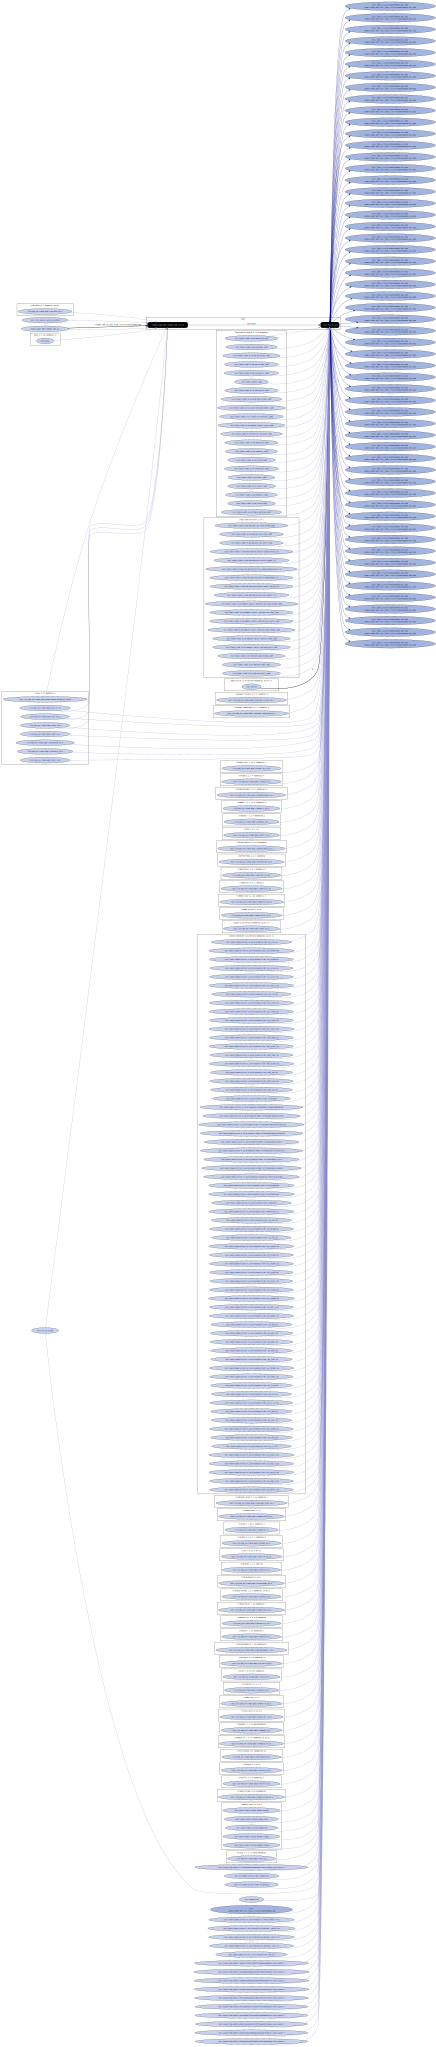

In [19]:
from graphviz import render

# Render to SVG:
render(engine='dot', filepath='pdf-render.dot', format='svg')
from IPython.display import SVG, HTML, FileLink, display

# Give a link to download the SVG:
display(FileLink('pdf-render.dot.svg'))
# Plot the SVG, but hack in a style to make it zoom out:
style = "<style>.output_svg div {width:100% !important;height:100% !important;</style>"
display(HTML(style))
display(SVG(filename='pdf-render.dot.svg'))